In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def get_file_name(state, year) :
    """ returns the filename that contains election results corresponding to a given year and state"""
    
    global_data_path = "C:\\Users\\madhu\\Documents\\git\\TEP\\data\\"
    state_year_data_path = global_data_path + str(year) + "\\" + state + "\\"
    if state == "AK" and year >= 2014 :
        return state_year_data_path + "results.txt"
    elif state == "AK" and year < 2014 :
        return state_year_data_path + "results.html"
    else :
        raise ValueError("State " + state + " is not yet supported")

def get_total_registered_voters(state, year) :
    """ returns total registered voters corresponding to a given year and state. 
    Must have held either a federal or a state-wide race """
    
    file = get_file_name(state, year)
    total_registered_voters = 0
    
    if file.endswith(".txt") :
        raw_data = pd.read_csv(file, header = None, encoding = "latin1")
        total_registered_voters = raw_data.loc[raw_data[0].apply(lambda x: x.strip()) == "US REPRESENTATIVE", 4].iloc[2]
    elif file.endswith(".html") :
        raw_data = pd.read_html(file)
        voters = [df_line.iloc[5,2] for df_line in raw_data if df_line.iloc[0,1] == "US REPRESENTATIVE"]
        total_registered_voters = int(str(voters[0]).split('/')[1])
        
    return int(total_registered_voters)

In [102]:
get_total_registered_voters("AK", 2018)

571851

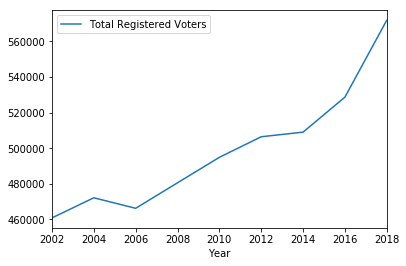

In [103]:
years = [2002, 2004, 2006, 2010, 2012, 2014, 2016, 2018]
total_registered_voters = [get_total_registered_voters("AK", year) for year in years]
#years = [2006, 2010, 2012] + years
#total_registered_voters = [495731, 494876, 506432] + total_registered_voters
data = pd.DataFrame(list(zip(years, total_registered_voters)))
data.columns = ["Year", "Total Registered Voters"]
data.plot(kind = "line", x = "Year", y = "Total Registered Voters")
plt.show()

In [94]:
file = get_file_name("AK", 2018)
file

'C:\\Users\\madhu\\Documents\\git\\TEP\\data\\2018\\AK\\results.txt'